In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import openpyxl
from scipy.stats import iqr

In [49]:
# Config do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [50]:
df = pd.read_csv("data.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Os mercados imobiliários, como os de Sydney e Melbourne, apresentam uma oportunidade interessante para os analistas de dados analisarem e preveem para onde os preços dos imóveis estão se movendo. A previsão dos preços dos imóveis está se tornando cada vez mais importante e benéfica. Os preços dos imóveis são um bom indicador da condição geral do mercado e da saúde econômica de um país. Considerando os dados fornecidos, estamos disputando um grande conjunto de registros de vendas de propriedades armazenados em um formato desconhecido e com problemas de qualidade de dados desconhecidos 

- `sqft_living` refere-se à área habitável de uma casa, medida em pés quadrados (square feet).
- `sqft_lot` refere-se à área do lete (square feet).

In [51]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


In [52]:
# Verificando se existem linhas duplicas no dataframe
df.duplicated().any()

np.False_

In [53]:
# Verificando campos nulos: Iconme tem 24 ocorrências de valores nulos
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [54]:
# Valores únicos de cada variável
valores_unicos = []
for coluna in df.columns[:29]:
    print(coluna, ':', len(df[coluna].astype(str).value_counts()))
    valores_unicos.append(df[coluna].astype(str).value_counts())


date : 70
price : 1741
bedrooms : 10
bathrooms : 26
sqft_living : 566
sqft_lot : 3113
floors : 6
waterfront : 2
view : 5
condition : 5
sqft_above : 511
sqft_basement : 207
yr_built : 115
yr_renovated : 60
street : 4525
city : 44
statezip : 77
country : 1


In [55]:
# Separando em variáveis Cateogricas e Não-Categóricas
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_df = df[cat_col]
print('Categorical columns :',cat_col)

num_col = [col for col in df.columns if df[col].dtype != 'object']
num_df = df[num_col]
print('Numerical columns :',num_col)

Categorical columns : ['date', 'street', 'city', 'statezip', 'country']
Numerical columns : ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


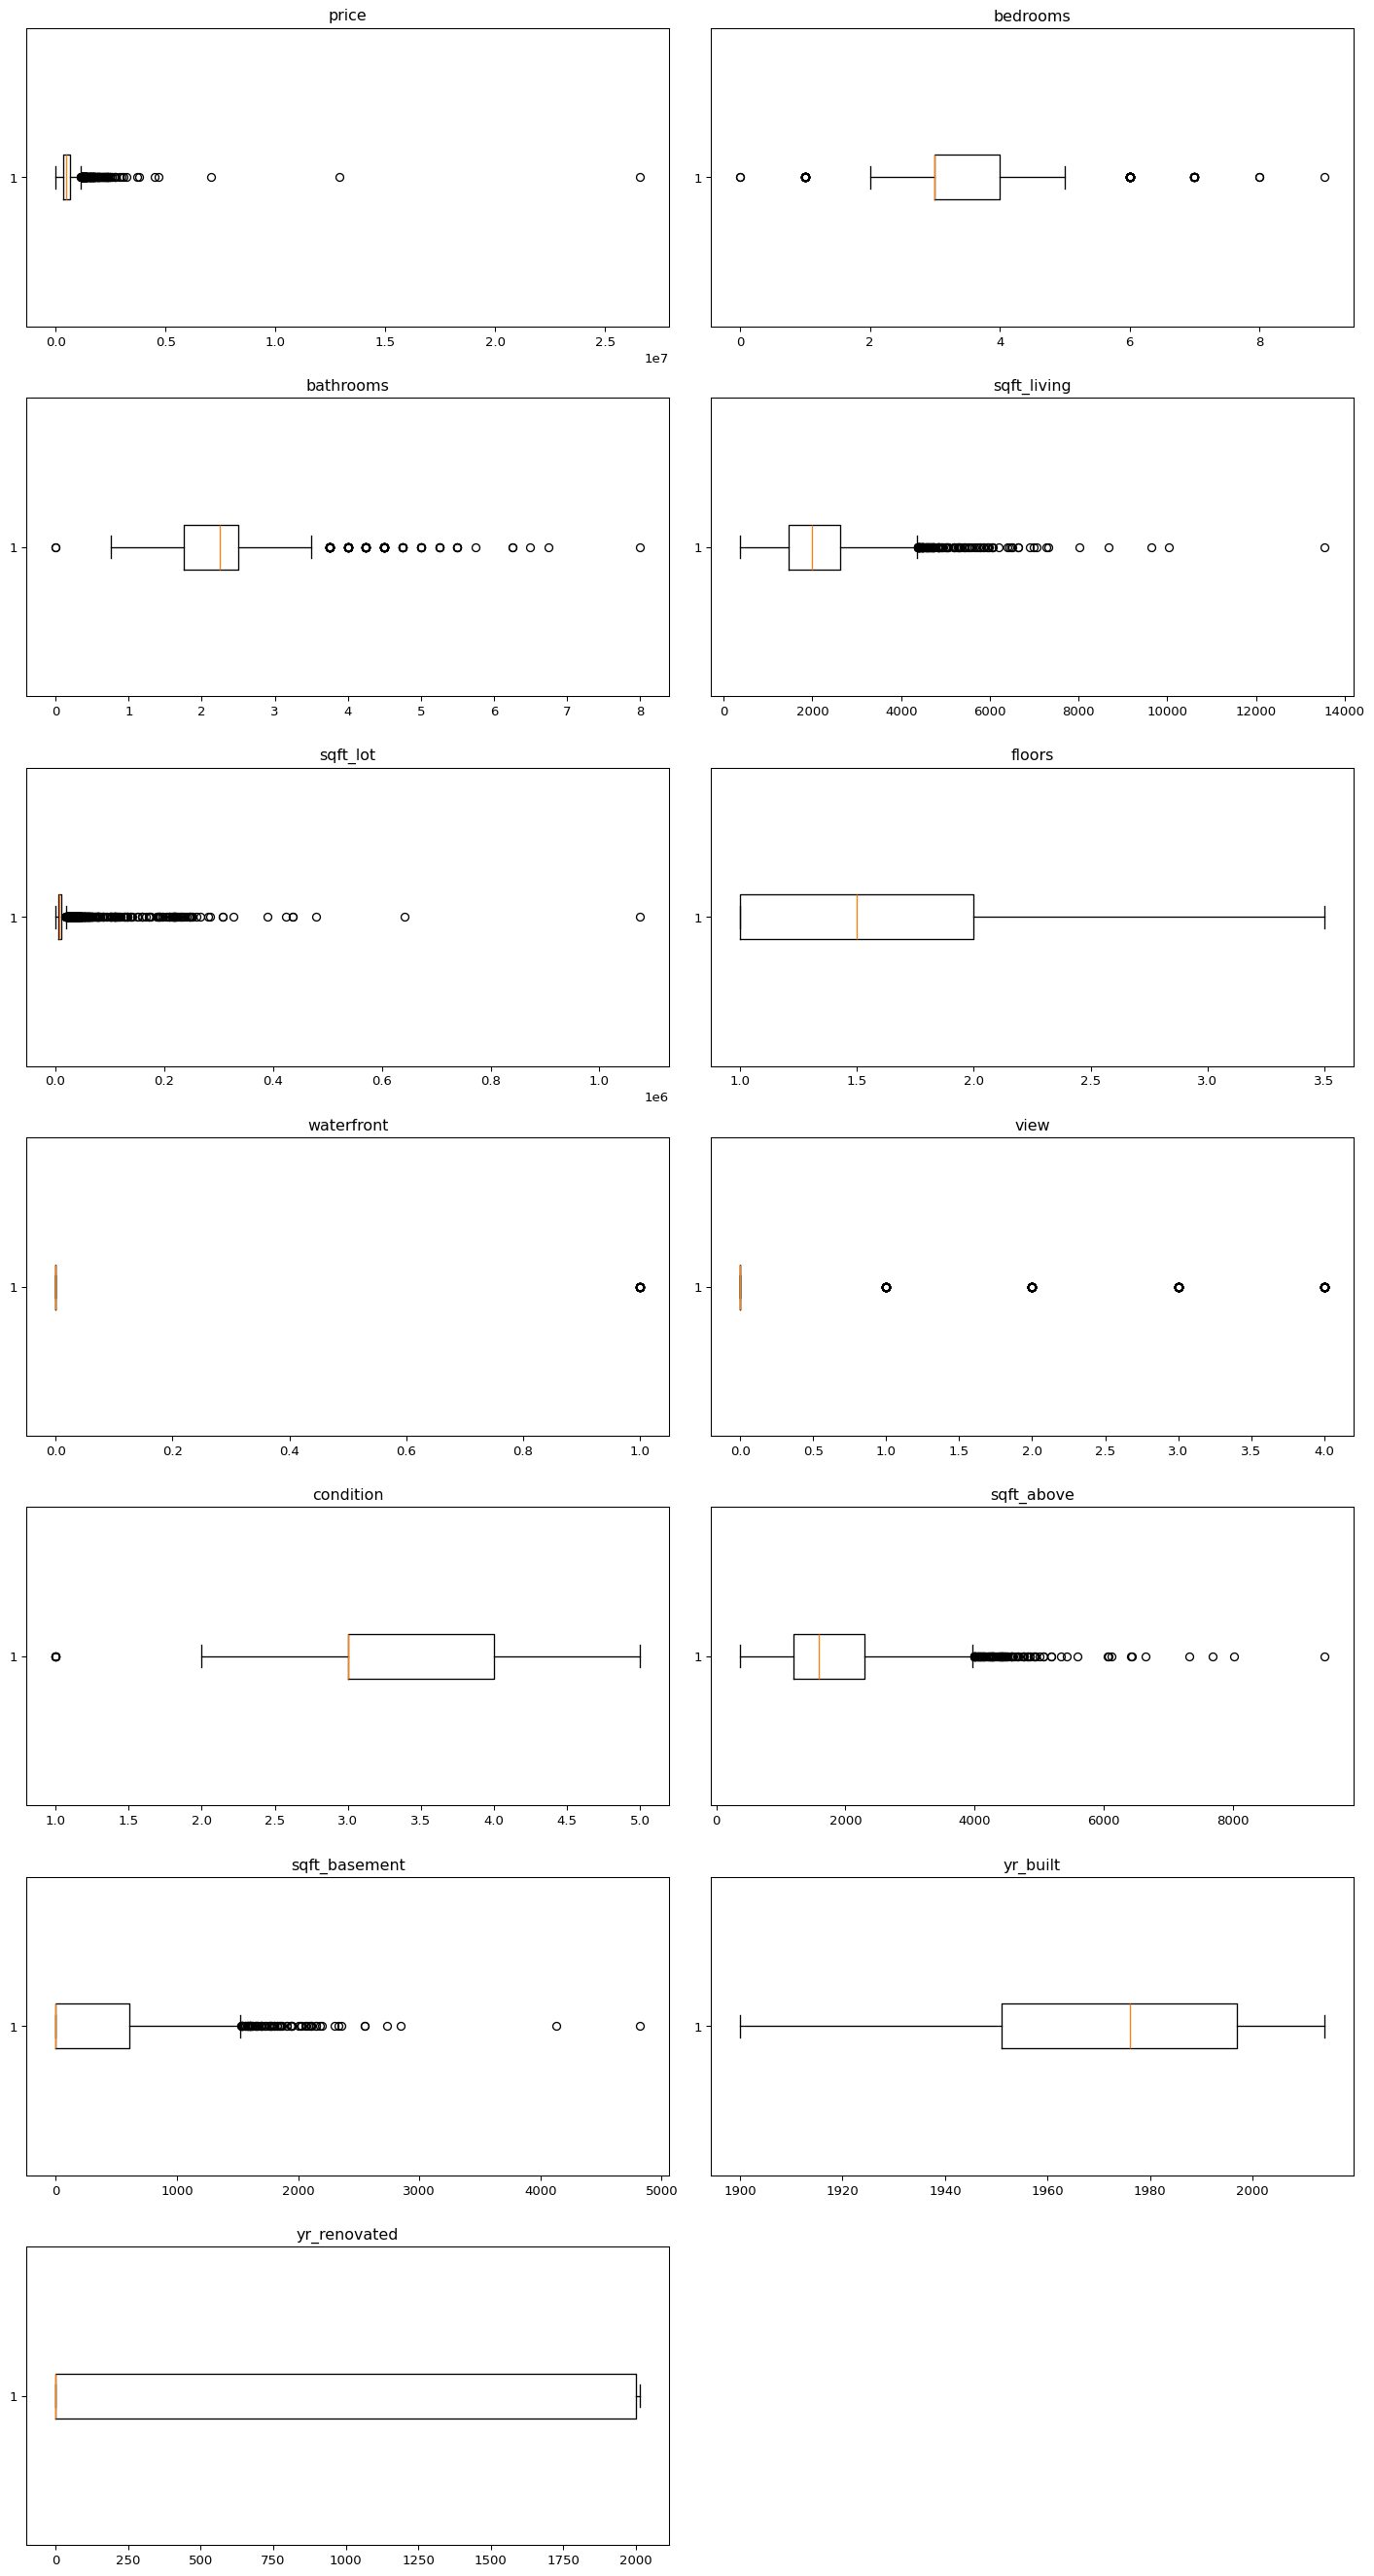

In [ ]:
num_cols = 2 
num_rows = int(np.ceil(len(num_col) / num_cols))  

fig, axs = plt.subplots(num_rows, num_cols, dpi=95, figsize=(15, 4 * num_rows))  

axs = axs.flatten() 

for i, col in enumerate(num_col):
    axs[i].boxplot(df[col], vert=False) 
    axs[i].set_title(col)
    axs[i].tick_params(axis='y', rotation=0)


for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [57]:
display(cat_df.nunique())

date          70
street      4525
city          44
statezip      77
country        1
dtype: int64

In [58]:
cat_df.apply(lambda x: sorted(x.unique())).to_frame()

,0
date,"[2014-05-02 00:00:00, 2014-05-03 00:00:00, 201..."
street,"[1 View Ln NE, 10 W Etruria St, 100 20th Ave E..."
city,"[Algona, Auburn, Beaux Arts Village, Bellevue,..."
statezip,"[WA 98001, WA 98002, WA 98003, WA 98004, WA 98..."
country,[USA]


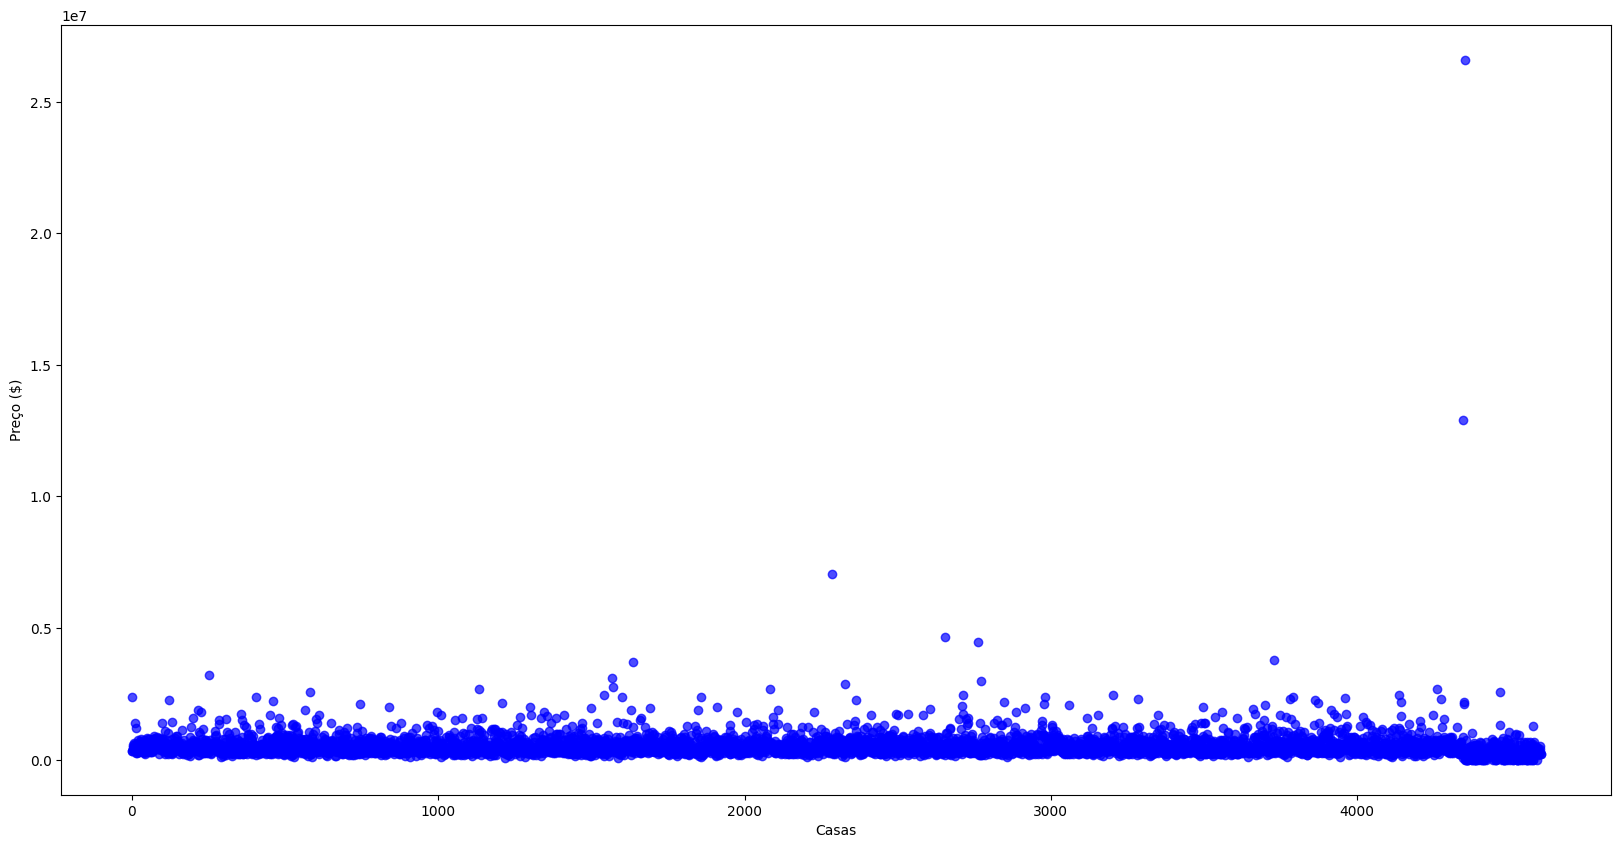

In [59]:
import numpy as np

plt.figure(figsize=(20, 10))  
plt.scatter(df.index, df["price"], color="blue", alpha=0.7)  
plt.xlabel("Casas")  
plt.ylabel("Preço ($)")  
plt.show()

In [60]:
print("min: ", df['price'].min())
print("max: ", df['price'].max())

min:  0.0
max:  26590000.0


In [61]:
q1, q3 = np.percentile(df['price'], [25, 75])
iqr_value = q3 - q1
q2 = df['price'].median()

print("Q1:", q1)
print("Q2:", q2)
print("Q3:", q3)
print("IQR:", iqr_value)

min_outflow = q1 - 1.5 * iqr_value
max_outflow = q3 + 1.5 * iqr_value

print("min_outflow:", min_outflow)
print("max_outflow:", max_outflow)


Q1: 322875.0
Q2: 460943.46153850004
Q3: 654962.5
IQR: 332087.5
min_outflow: -175256.25
max_outflow: 1153093.75


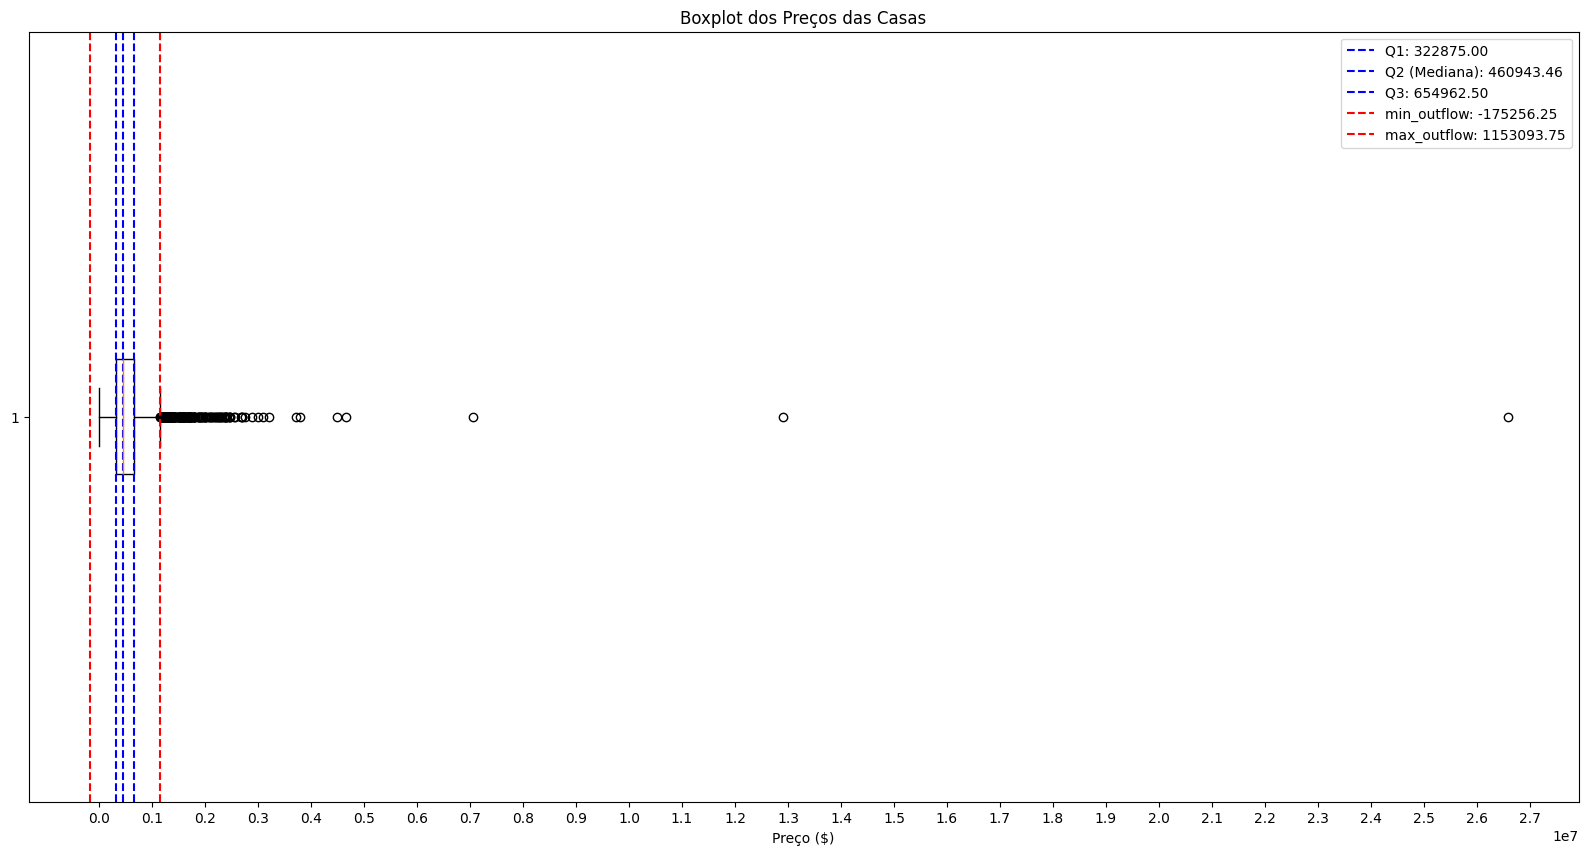

In [ ]:
plt.figure(figsize=(20, 10))
plt.boxplot(df['price'], vert = False)
plt.xlabel("Preço ($)")
plt.title("Boxplot dos Preços das Casas")

min_price = df['price'].min()
max_price = df['price'].max()
plt.xticks(np.arange(0, max_price + 1000000, 1000000)) 

plt.axvline(q1, color="blue", linestyle="--", label=f"Q1: {q1:.2f}")
plt.axvline(q2, color="blue", linestyle="--", label=f"Q2 (Mediana): {q2:.2f}")
plt.axvline(q3, color="blue", linestyle="--", label=f"Q3: {q3:.2f}")

plt.axvline(min_outflow, color="red", linestyle="--", label=f"min_outflow: {min_outflow:.2f}")
plt.axvline(max_outflow, color="red", linestyle="--", label=f"max_outflow: {max_outflow:.2f}")

plt.legend()
plt.show()

In [63]:
df_no_outliers = df[(df['price'] >= min_outflow) & (df['price'] <= max_outflow)]
df_no_outliers.tail(5).sort_values(by='price')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4598,2014-07-10 00:00:00,203400.00,4.00,2.00,2090,6630,1.00,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.00,3.00,2.50,1490,8102,2.00,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA
4595,2014-07-09 00:00:00,308166.67,3.00,1.75,1510,6360,1.00,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4597,2014-07-09 00:00:00,416904.17,3.00,2.50,3010,7014,2.00,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4596,2014-07-09 00:00:00,534333.33,3.00,2.50,1460,7573,2.00,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA


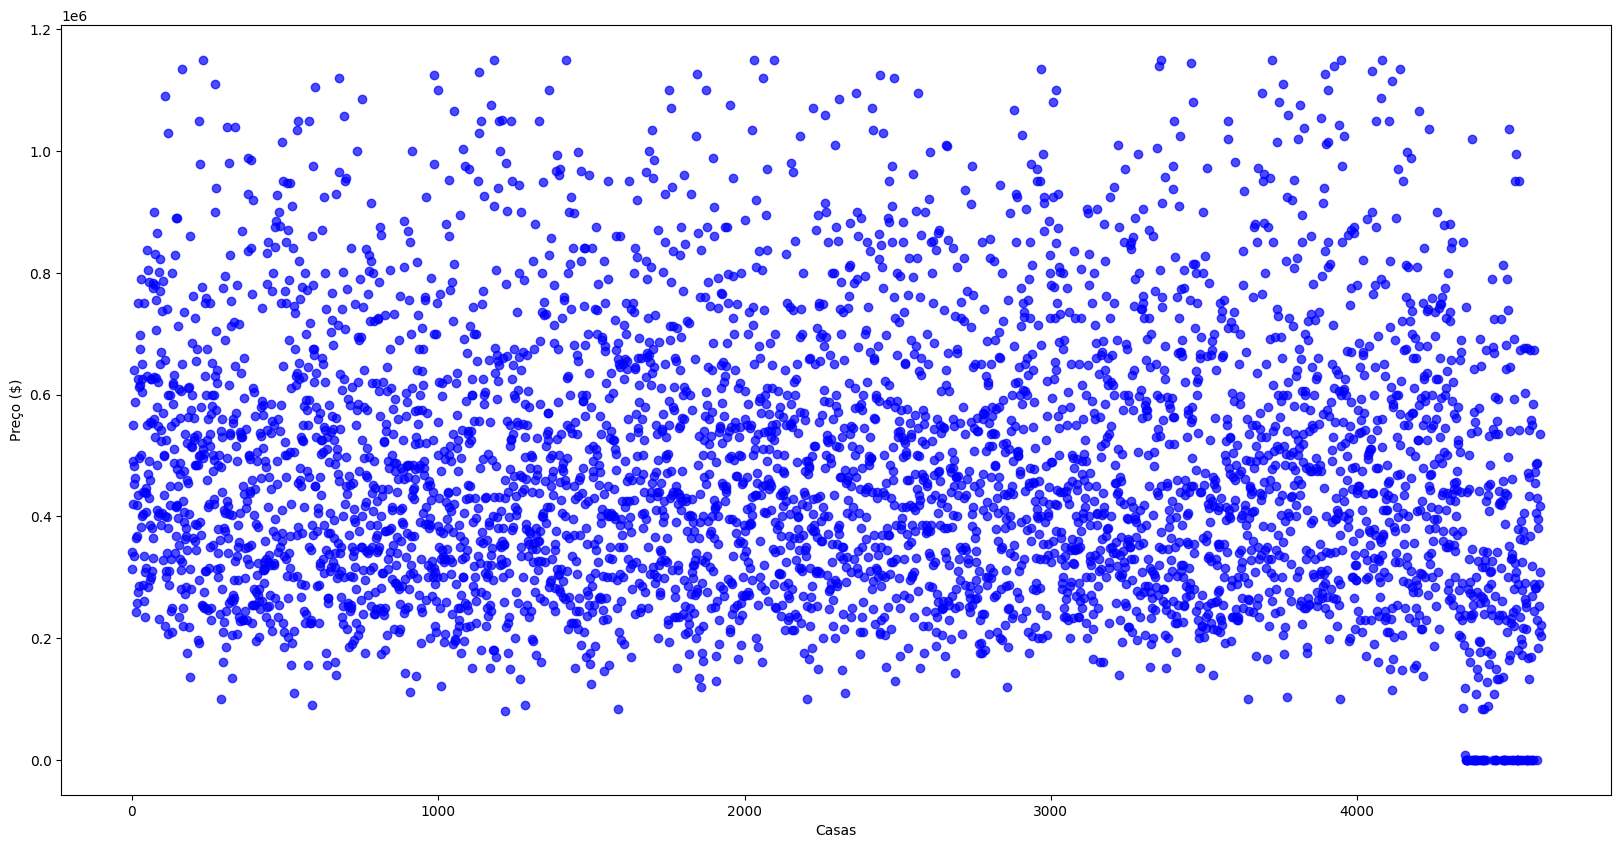

In [64]:
plt.figure(figsize=(20, 10))  
plt.scatter(df_no_outliers.index, df_no_outliers["price"], color="blue", alpha=0.7)  
plt.xlabel("Casas")  
plt.ylabel("Preço ($)")  
plt.show()

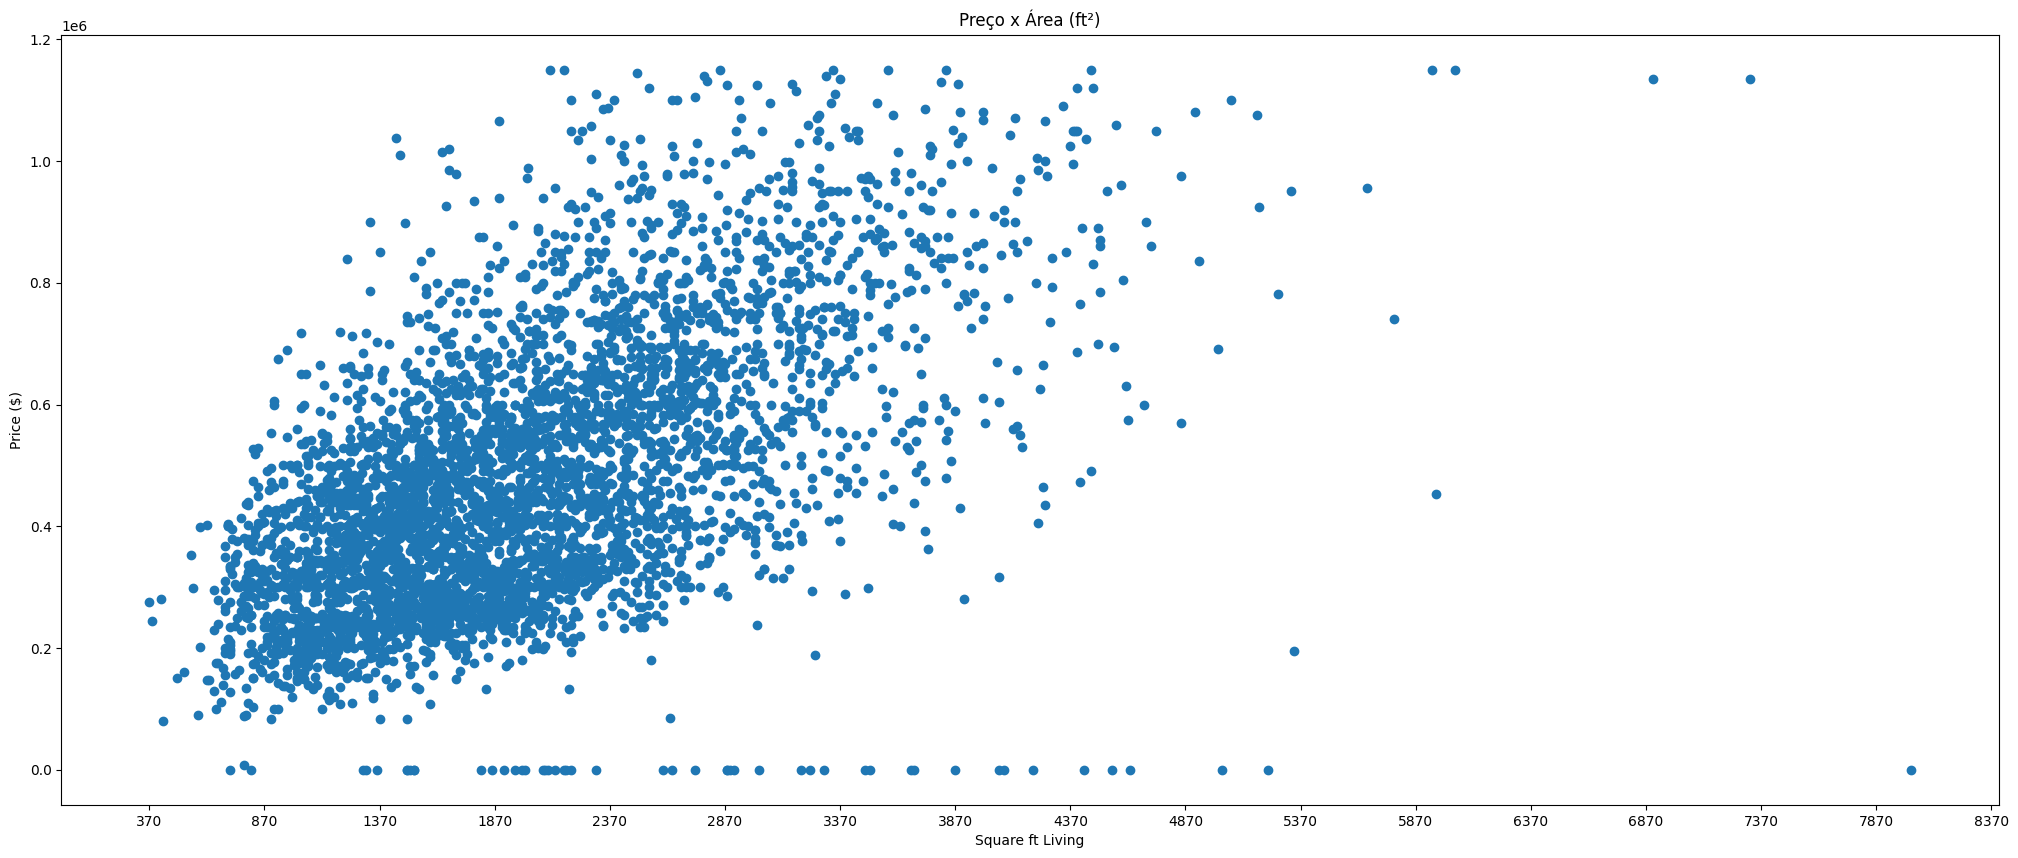

In [65]:
plt.figure(figsize=(25, 10))  

Y = df_no_outliers['price']
X = df_no_outliers['sqft_living']

plt.scatter(X, Y)
plt.xlabel("Square ft Living")
plt.ylabel("Price ($)")
plt.title("Preço x Área (ft²)")

plt.xticks(np.arange(X.min(), X.max()+500, 500))

plt.show()


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = df_no_outliers[['sqft_living']]  # Variável independente
y = df_no_outliers['price']          # Variável dependente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = modelo.predict(X_test)

In [69]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 140744.97
RMSE: 181686.79


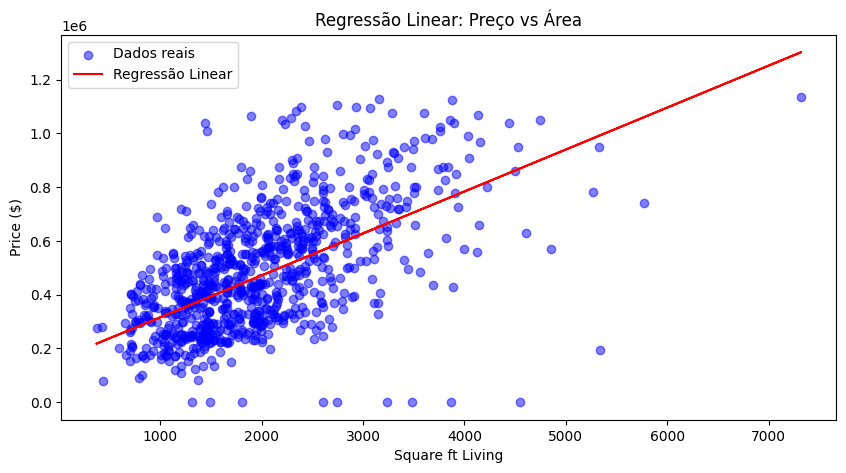

In [70]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label="Dados reais", alpha=0.5)
plt.plot(X_test, y_pred, color='red', label="Regressão Linear")
plt.xlabel("Square ft Living")
plt.ylabel("Price ($)")
plt.title("Regressão Linear: Preço vs Área")
plt.legend()
plt.show()